In [1]:
from skimage.transform import pyramid_gaussian
from skimage.util import view_as_windows
from skimage.feature import hog
from skimage.io import imread, imshow
import pickle
import os

In [2]:
def loadModel(path=""):
    """
    Load persisted model
    """
    with open(path+'modelPkl' , 'rb') as files:
        model = pickle.load(files)
    return model

In [3]:
def loadImgs(srcPath):
    """
    Returns:
        - images (List): List of rgb images
    """
    images = []
    for filename in os.listdir(srcPath):
        img = imread(os.path.join(srcPath, filename))
        images.append(img)

    
    return images

In [4]:
def buildPyramid(img, scale=2):
    """
    Returns:
        - imgs(generator): pyramid of images
    """
    # rows, cols, dim = img.shape
    pyramid = tuple(pyramid_gaussian(img, downscale=scale, channel_axis=-1))
    return pyramid

In [5]:
def getWindows(pymImg,shape=(128,64,3)):
    windows = view_as_windows(pymImg, shape, step=(32,16,3))
    return windows

In [6]:
def HOG(img):
    # imshow(img)
    hogImg = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
        block_norm='L2', feature_vector=True, channel_axis=-1) # feature vector= true, channel_Axis=2
    return hogImg


In [7]:
def predictPed(img):
    """
    Returns:
        - detection (Bool)
    """
    model = loadModel()
    ans = model.predict(img.reshape(1, -1))
    return ans

In [31]:
def runDetector(img):
    """
    """
    complete = []
    # for img in imgs: 
    pyramid = buildPyramid(img)
    for level, pymImg in enumerate(pyramid):
        if pymImg.shape >= (128,64,3):
            window = getWindows(pymImg,(128,64,3))
            rows,cols = window.shape[0], window.shape[1]
            for row in range(rows):
                for col in range(cols):
                    hogWindow = HOG(window[row,col,0])
                    ans = predictPed(hogWindow)
                    if ans == 1:
                        complete.append(f"Coordinates {row}, {col}, Level:{level}")
        else: 
            break
    return complete


In [10]:
img = imread(os.path.join("85.jpeg"))

In [34]:
x = runDetector(img)
print(x,end="\n")

['Coordinates 3, 1, Level:0', 'Coordinates 3, 3, Level:0', 'Coordinates 3, 11, Level:0', 'Coordinates 4, 7, Level:0', 'Coordinates 4, 9, Level:0']


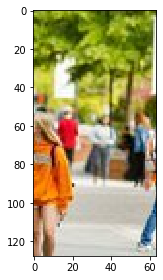

In [35]:
window = getWindows(img,(128,64,3))
imshow(window[3][11][0])

In [17]:
x.shape

(128, 64, 3)

In [ ]:
src_path = "/usr/" #read path
dst_path = "/usr/" #write path
